# Energy calibration

In [2]:
using Revise
using CodeTracking
push!(LOAD_PATH, "$(homedir())/Development/")
using JSort
using Plots
using PyCall
using StatsBase
using ColorSchemes

function plotmat(matrix)
    G = convert(Array{Float64, 2}, matrix)
    log10transform!(G)
    pl = heatmap(G', c=:viridis, yticks=([1:length(chns);], chns))
end

function plotstrip(strips; kwargs...)
    G = hcat(strips...)
    G = convert(Array{Float64, 2}, G)
    log10transform!(G)
    pl = heatmap(G';kwargs...)
end

function log10transform!(G)
    G[G .> 0] .= log10.(G[G .> 0])
    G[G .≤ 0] .= NaN
end

function log10transform(V)
    G = zeros(Float64, size(V))
    G[V .> 0] .= log10.(V[V .> 0])
    G[V .≤ 0] .= NaN
    G
end

┌ Info: Precompiling JSort [e0ebc282-81fe-11e9-3a6c-c708bf7e9f76]
└ @ Base loading.jl:1273
  ** incremental compilation may be fatally broken for this module **



log10transform (generic function with 1 method)

┌ Warning: /home/erdos/.julia/packages/Plots/qZHsp/src/Plots.jl/ is not an existing directory, Revise is not watching
└ @ Revise /home/erdos/.julia/packages/Revise/S7mrl/src/Revise.jl:489


In [4]:
## Load the preprocessed data
path = "$(homedir())/master/sortering/"
@time events = loadlabr(path*"sirius");
#parameters = Parameters(path*"si28.yaml");
#parameters.calibrator[:t] |> display

# Sort the datafile
@time makeeΔe(events, parameters)
#@time ge, gt = makelabr(events, parameters);
#mat = copy(ge.matrix);

# Find the good channels
#chns = goodchannels(mat);
# chn 32 still looks bad
#pop!(chns)
#G = mat[:, chns];
#M = [G[:, i] for i in 1:size(G, 2)];

  7.433707 seconds (31.75 M allocations: 841.731 MiB, 2.94% gc time)


In [95]:
parameters

Parameters for 28Si
Loaded from /home/erdos/master/sortering/si28.yaml.
e-calibration coefficients:
1, 1: 25.00x^2
1, 2: 25.00x^2
1, 3: 25.00x^2
1, 4: 25.00x^2
1, 5: 25.00x^2
1, 6: 25.00x^2
1, 7: 25.00x^2
1, 8: 25.00x^2
2, 1: 25.00x^2
2, 2: 25.00x^2
2, 3: 25.00x^2
2, 4: 25.00x^2
2, 5: 25.00x^2
2, 6: 25.00x^2
2, 7: 25.00x^2
2, 8: 25.00x^2
3, 1: 25.00x^2
3, 2: 25.00x^2
3, 3: 25.00x^2
3, 4: 25.00x^2
3, 5: 25.00x^2
3, 6: 25.00x^2
3, 7: 25.00x^2
3, 8: 25.00x^2
4, 1: 25.00x^2
4, 2: 25.00x^2
4, 3: 25.00x^2
4, 4: 25.00x^2
4, 5: 25.00x^2
4, 6: 25.00x^2
4, 7: 25.00x^2
4, 8: 25.00x^2
5, 1: 25.00x^2
5, 2: 25.00x^2
5, 3: 25.00x^2
5, 4: 25.00x^2


5, 5: 25.00x^2
5, 6: 25.00x^2
5, 7: 25.00x^2
5, 8: 25.00x^2
6, 1: 25.00x^2
6, 2: 25.00x^2
6, 3: 25.00x^2
6, 4: 25.00x^2
6, 5: 25.00x^2
6, 6: 25.00x^2
6, 7: 25.00x^2
6, 8: 25.00x^2
7, 1: 25.00x^2
7, 2: 25.00x^2
7, 3: 25.00x^2
7, 4: 25.00x^2
7, 5: 25.00x^2
7, 6: 25.00x^2
7, 7: 25.00x^2
7, 8: 25.00x^2
8, 1: 25.00x^2
8, 2: 25.00x^2
8, 3: 25.00x^2
8, 4: 25.00x^2
8, 5: 25.00x^2
8, 6: 25.00x^2
8, 7: 25.00x^2
8, 8: 25.00x^2

Δe-calibration coefficients:
1, 1: 6.25x^2
1, 2: 6.25x^2
1, 3: 6.25x^2
1, 4: 6.25x^2
1, 5: 6.25x^2
1, 6: 6.25x^2
1, 7: 6.25x^2
1, 8: 6.25x^2
2, 1: 6.25x^2
2, 2: 6.25x^2
2, 3: 6.25x^2
2, 4: 6.25x^2
2, 5: 6.25x^2
2, 6: 6.25x^2
2, 7: 6.25x^2
2, 8: 6.25x^2
3, 1: 6.25x^2
3, 2: 6.25x^2
3, 3: 6.25x^2
3, 4: 6.25x^2
3, 5: 6.25x^2
3, 6: 6.25x^2
3, 7: 6.25x^2
3, 8: 6.25x^2
4, 1: 6.25x^2
4, 2: 6.25x^2
4, 3: 6.25x^2
4, 4: 6.25x^2
4, 5: 6.25x^2
4, 6: 6.25x^2
4, 7: 6.25x^2
4, 8: 6.25x^2
5, 1: 6.25x^2
5, 2: 6.25x^2
5, 3: 6.25x^2
5, 4: 6.25x^2
5, 5: 6.25x^2
5, 6: 6.25x^2
5, 7: 6.25x^2
5, 8

In [90]:
taligned, coeff = aligntime(tspectra, tedges)
savecoefficients(parameters, "gainshift_t", coeff, chns)

coefficients = Array{Float64,1}[[1.0, 0.0, 1.0, 0.0], [2.0, 32.643502377179004, 0.9613312202852617, 0.0], [3.0, 0.0, 1.0, 0.0], [4.0, 0.0, 1.0, 0.0], [5.0, 0.0, 1.0, 0.0], [6.0, -13.952679978363108, 0.9794209647451724, 0.0], [7.0, -11.667971181955267, 0.9698125341074177, 0.0], [8.0, -16.04873395149781, 0.9670292439372326, 0.0], [9.0, 0.0, 1.0, 0.0], [10.0, -1.9690502129351444, 0.9533772407645833, 0.0], [11.0, -13.553165749495548, 0.9815161797393075, 0.0], [12.0, -56.700397943608294, 0.9882431830903585, 0.0], [13.0, -8.204317161239743, 0.9689011978191726, 0.0], [14.0, -51.22233049174389, 0.9971253469325023, 0.0], [15.0, -8.678411914452397, 0.9656979314339722, 0.0], [16.0, 0.0, 1.0, 0.0], [17.0, 34.54011704458492, 0.9463779787951578, 0.0], [18.0, 33.23600629426562, 0.9902719776203883, 0.0], [19.0, 0.0, 1.0, 0.0], [20.0, 35.934011860874875, 0.9560346209328424, 0.0], [21.0, 0.0, 1.0, 0.0], [22.0, 37.92072999178072, 0.9730385668044511, 0.0], [23.0, 32.75121135613176, 0.9780851486200473, 0.0

In [96]:
chns = goodchannels(ge, deviationlimit=0.005)
pop!(chns)
edges = 1:5:15_500
spectra = [binhist(ge[i], edges) for i in chns];
tedges = 1:1:500
tspectra = [binhist(gt[i], tedges) for i in chns];

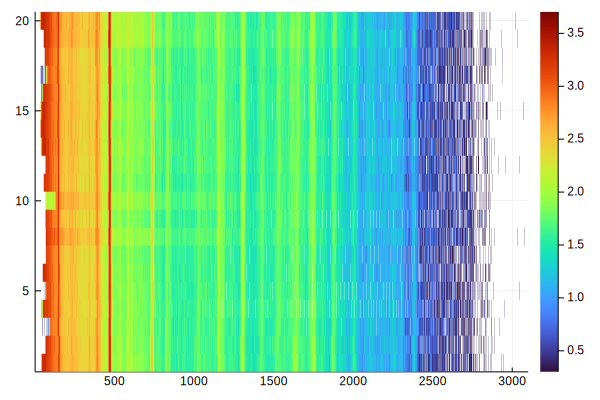

In [98]:
plotstrip(spectra, c=cgrad(ColorSchemes.turbo.colors))

In [14]:
signal = pyimport("scipy.signal")
smoother(x) = signal.savgol_filter(x, 51, 4)
lowregion = 135:1300
highregion = 1450:2600
first_coefficients, alignedspectra1 = alignspectra(spectra, lowregion=lowregion, 
                                                  highregion=highregion,
                                                  highsmoother=smoother)
#savecoeff(first_coefficients, "first")
second_coefficients, alignedspectra = alignspectra(alignedspectra1, lowregion=lowregion, 
                                            highregion=highregion, lowsearchwidth=10,
                                            highsearchwidth = 10, lownumregions=15,
                                            highsmoother=smoother)
#savecoeff(second_coefficients, "second")

plotstrip(spectra, c=cgrad(ColorSchemes.turbo.colors))
plot!([first(lowregion), last(lowregion)], linetype=[:vline])
plot!([first(highregion), last(highregion)], linetype=[:vline])
#plotstrip(spectra)

MethodError: MethodError: no method matching alignspectra(::Array{Array{Int64,1},1}; lowregion=135:1300, highregion=1450:2600, highsmoother=smoother)
Closest candidates are:
  alignspectra(::Any, !Matched::Any; lowregion, highregion, lowregionwidth, highregionwidth, lownumregions, highnumregions, lowsmoother, highsmoother, lowsearchwidth, highsearchwidth, referenceindex, order) at /home/erdos/gits/JSort/src/alignment.jl:129

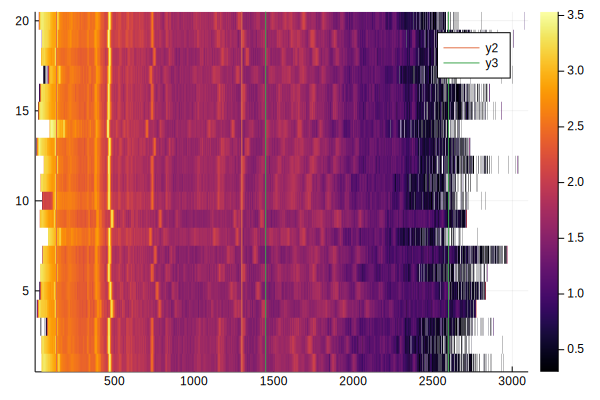

In [14]:
plotstrip(alignedspectra)
plot!([first(lowregion), last(lowregion)], linetype=[:vline])
plot!([first(highregion), last(highregion)], linetype=[:vline])

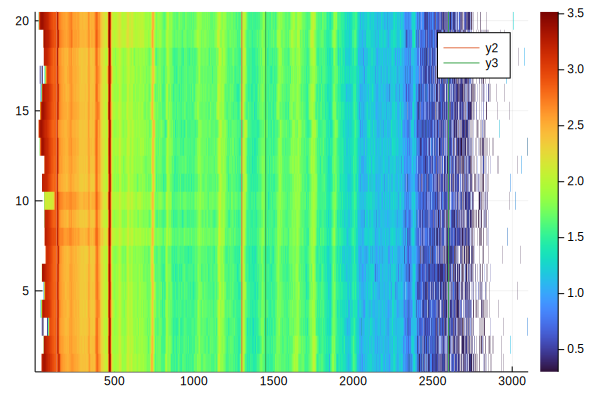

In [17]:
plotstrip(alignedspectra1, c=cgrad(ColorSchemes.turbo.colors))
plot!([first(lowregion), last(lowregion)], linetype=[:vline])
plot!([first(highregion), last(highregion)], linetype=[:vline])

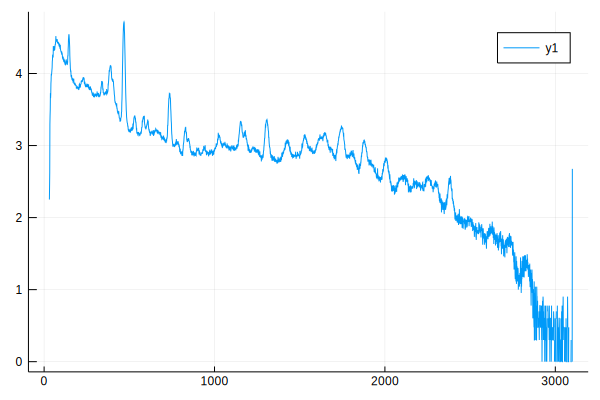

In [117]:
plot(sum(spectra) |> log10transform)

# TODO

- Something is very odd with the coefficients. They change. 
Check if they change when aligning using matrix in memory.
 - Perhaps numerical errors?
 - rand() in ucalib? Yes